In [21]:
from __future__ import division, print_function, unicode_literals


import pandas as pd
import numpy as np

import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

import itertools
from sklearn.utils import resample
from math import sqrt
import statistics

from sklearn.preprocessing import StandardScaler, LabelEncoder , PolynomialFeatures ,MinMaxScaler

from sklearn import neighbors , datasets

from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, Lasso , Ridge , LinearRegression
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split ,ShuffleSplit, KFold
from sklearn.model_selection import cross_val_score, validation_curve ,learning_curve, GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report, confusion_matrix,roc_curve,auc,mean_squared_error,mean_absolute_error


In [3]:
train = pd.read_csv(r'C:\Users\banva\Desktop\MSBA\Intro to BA\Project\withoutdummies.csv', na_values='')
#print(train.head())
#print(train.info())
#print(train.shape)

In [4]:
traindum = pd.read_csv(r'C:\Users\banva\Desktop\MSBA\Intro to BA\Project\withdummies.csv', na_values='')
#print(train.head())
#print(train.info())
#print(train.shape)

# NAIVE RULE

In [39]:
a=train.loc[:,'price'].mean()
b=np.repeat(a, 70962, axis=None)


array([74.62933641, 74.62933641, 74.62933641, ..., 74.62933641,
       74.62933641, 74.62933641])

In [40]:
mean_squared_error(train.loc[:,'price'], b)

1020.8083091943762

# LASSO REGRESSION

In [27]:
X = traindum.iloc[:,1:] 
y = traindum.loc[:,'price'] 

### GRIDSEARCHCV

In [59]:
import sys
import warnings

if not sys.warnoptions:
 warnings.simplefilter("ignore") 

inner_cv = KFold(n_splits=10, shuffle=True,random_state=42)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)

GS_lasso = GridSearchCV(estimator=Lasso(),
                  param_grid= [{'alpha':[0,0.25,0.5,0.75,1.0], 
                                'fit_intercept':[True,False], 
                                'normalize':[True,False], 
                                'max_iter':[1,5,10,15,20]}],  
                  scoring = 'neg_mean_squared_error',
                  cv=10)

GS_lasso.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0, 0.25, 0.5, 0.75, 1.0], 'fit_intercept': [True, False], 'normalize': [True, False], 'max_iter': [1, 5, 10, 15, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [60]:
print(" Parameter Tuning for Lasso Regression")
print()
print("Non-nested CV MSE : ", GS_lasso.best_score_)
print()
print("Optimal Parameter: ", GS_lasso.best_params_)    # Parameter setting that gave the best results on the hold out data.
print()
print("Optimal Estimator: ", GS_lasso.best_estimator_)
print()

GS_lasso_nested = cross_val_score(GS_lasso, X=X, y=y, cv= 10 , scoring="neg_mean_squared_error")

print("Nested CV mse: ",GS_lasso_nested.mean(), " +/- ", GS_lasso_nested.std())

 Parameter Tuning for Lasso Regression

Non-nested CV MSE :  -223.86741548184025

Optimal Parameter:  {'alpha': 0, 'fit_intercept': True, 'max_iter': 20, 'normalize': True}

Optimal Estimator:  Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=20, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

Nested CV mse:  -223.86621545473645  +/-  27.895949280347477


### CROSSVALIDATION

In [51]:
cross_val_lasso = cross_val_score(Lasso(), X=X, y=y, cv=10 ,scoring = "neg_mean_squared_error")
print(" MSE: ", cross_val_lasso.mean(), " +/- ", cross_val_lasso.std())

 Performance:  -383.3880305419385  +/-  86.63509437159826


### TRAIN_TEST_SPLIT

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
lasso = Lasso(alpha=0, fit_intercept=True, max_iter=20, normalize=True  )   

lasso.fit(X_train, y_train) 

y_train_pred = lasso.predict(X_train) 

y_test_pred = lasso.predict(X_test)   

print(lasso.coef_)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred))) 

print('MAE train: %.3f, test: %.3f' % ( 
        mean_absolute_error(y_train, y_train_pred),
        mean_absolute_error(y_test, y_test_pred))) 

C:\Users\banva\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\banva\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


[ 2.21494160e-01 -2.68713661e+00  1.44957888e+00 -7.16396681e+00
  3.66383944e+01  1.04373556e+01  1.92152768e+02 -1.54605457e+00
  4.38977507e+00 -3.07880573e+01 -2.21695060e+01 -3.74532501e+01
  3.13399145e+00  3.72073781e+00  4.48881924e+00 -1.31823879e+00
 -4.07363968e+00 -3.20321115e+00  4.34851018e-01 -9.81066448e-02
  4.50523233e-01 -3.09800256e-01  4.02098886e-01  7.71151140e-02
  2.82254136e-01  1.45638240e+00  1.13339023e+00  1.01957284e+00
 -4.50791048e-02 -3.91948836e-01  1.84498374e-01  1.29747676e+00
 -1.18872815e+00  9.38904520e-01 -4.66266351e-01  3.82425166e-01
 -6.46892854e-01 -6.32204316e-01 -1.22949825e-01 -2.21597528e-01
 -5.58156744e-02  2.74677120e+00 -5.16301146e-01 -2.86738046e-02
 -1.40922876e+00 -6.30595105e-01 -7.04508498e-01 -9.49582559e-01
 -5.18849941e+00 -9.93641624e+00 -4.78274932e+00 -2.74236508e-01
  3.09679026e+00  9.18354989e-01  1.30323334e-01  8.20214773e-02
 -3.85616683e-03  6.21343883e-01 -3.59650201e+00  8.06294465e+00
 -1.75394211e+01 -3.95579

C:\Users\banva\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# REGRESSION TREE

In [9]:
X1 = traindum.iloc[:,1:] 
y1 = traindum.loc[:,'price'] 

In [16]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70963 entries, 0 to 70962
Columns: 149 entries, travel_time to route_8
dtypes: float64(1), int64(148)
memory usage: 80.7 MB


### GRIDSEARCHCV

In [11]:
GS_DT = GridSearchCV(DecisionTreeRegressor(), 
                     param_grid=[{'max_depth':range(3,50)}], 
                     n_jobs=4,
                     scoring='neg_mean_squared_error',
                     cv=10) 

GS_DT.fit(X1, y1)

print(" Parameter Tuning")
print()
print("Non-nested Performance: ", GS_DT.best_score_)
print()
print("Optimal Parameter: ",GS_DT.best_params_)  
print() 
print("Optimal Estimator: ", GS_DT.best_estimator_) 
print()

 Parameter Tuning

Non-nested Performance:  -172.5156345113843

Optimal Parameter:  {'max_depth': 13}

Optimal Estimator:  DecisionTreeRegressor(criterion='mse', max_depth=13, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')



### CROSS VALIDATION

In [13]:
GS_DT_CV = cross_val_score(GS_DT, X=X1, y=y1, cv=10)
print("Nested CV Performance: ",GS_DT_CV.mean(), " +/- ", GS_DT_CV.std())

Nested CV Performance:  -175.13154403181096  +/-  39.50586454444203


### TRAIN TEST SPLIT

In [15]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

tree = DecisionTreeRegressor(max_depth=13)
tree.fit(X_train1, y_train1)

y_train_pred = tree.predict(X_train1)
y_test_pred = tree.predict(X_test1) 

print('MSE train: %.3f, test: %.3f' % ( 
        mean_squared_error(y_train1, y_train_pred),
        mean_squared_error(y_test1, y_test_pred)))
print('MAE train: %.3f, test: %.3f' % ( 
        mean_absolute_error(y_train1, y_train_pred),
        mean_absolute_error(y_test1, y_test_pred))) 

MSE train: 125.043, test: 151.819
MAE train: 7.492, test: 8.221


# KNN REGRESSION

In [54]:
X2 = traindum.iloc[:,1:] 
y2 = traindum.loc[:,'price'] 

sc = StandardScaler()
sc.fit(X2)
X_std2=sc.transform(X2)

C:\Users\banva\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\banva\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### GRIDSEARCHCV

In [55]:
GS_KNN = GridSearchCV(estimator=neighbors.KNeighborsRegressor(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring= "neg_mean_squared_error",    
                  cv=5,
                  n_jobs=5)

GS_KNN.fit(X_std2,y2)  

print("\n Parameter Tuning ")
print()
print("Non-nested CV f1: ", GS_KNN.best_score_)
print()
print("Optimal Parameter: ", GS_KNN.best_params_)
print()
print("Optimal Estimator: ", GS_KNN.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
print()




 Parameter Tuning 

Non-nested CV f1:  -489.6189857815545

Optimal Parameter:  {'n_neighbors': 21, 'weights': 'distance'}

Optimal Estimator:  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=21, p=2,
          weights='distance')



### CROSS VALIDATION

In [ ]:
GS_KNN_CV = cross_val_score(GS_KNN, X=X_std2, y=y2, cv=10 , scoring= "neg_mean_squared_error")

print("Nested CV f1: ",GS_KNN_CV.mean(), " +/- ", GS_KNN_CV.std())

### TRAIN TEST SPLIT

In [61]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

KNN = neighbors.KNeighborsRegressor()
KNN.fit(X_train1, y_train1)

y_train_pred = KNN.predict(X_train1)
y_test_pred = KNN.predict(X_test1) 

print('MSE train: %.3f, test: %.3f' % ( 
        mean_squared_error(y_train1, y_train_pred),
        mean_squared_error(y_test1, y_test_pred)))
print('MAE train: %.3f, test: %.3f' % ( 
        mean_absolute_error(y_train1, y_train_pred),
        mean_absolute_error(y_test1, y_test_pred))) 

MSE train: 226.024, test: 345.907
MAE train: 10.630, test: 13.233


# LEARNING CURVES

[[0.73575222 0.750467   0.74066683 0.71558049 0.74508618 0.73241379
  0.74636262 0.71958495 0.7564339  0.71988754]
 [0.75668919 0.7573042  0.7495464  0.75212797 0.76390748 0.75869955
  0.75868124 0.75175386 0.75659096 0.75338739]
 [0.76397694 0.76466331 0.76006412 0.76412967 0.7678383  0.76817525
  0.76276956 0.75913666 0.76263023 0.75897176]
 [0.77050406 0.77181017 0.7683281  0.76956199 0.7728961  0.77281128
  0.77109661 0.76836952 0.76744486 0.76882141]
 [0.77779569 0.77824254 0.77513367 0.77669771 0.77822806 0.7780815
  0.77652513 0.77418305 0.7738913  0.77840124]]


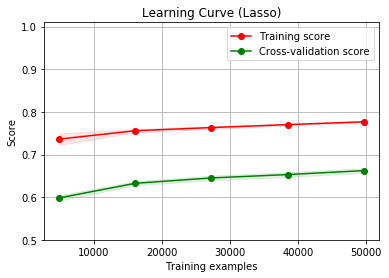

[[0.99213516 0.99293088 0.99150345 0.99380064 0.99247611 0.99294279
  0.99153933 0.99105697 0.99324882 0.99160483]
 [0.97901141 0.98017207 0.97794782 0.97618004 0.98086727 0.97782881
  0.97942598 0.97744197 0.97924982 0.98023353]
 [0.96789752 0.9699874  0.9679006  0.96751769 0.97037417 0.96763008
  0.96840069 0.96775037 0.96784287 0.96890331]
 [0.95985026 0.95997842 0.9588678  0.95963928 0.96082065 0.95949334
  0.96039429 0.95910415 0.95912811 0.95989124]
 [0.95314841 0.95295428 0.95197415 0.95230283 0.95243642 0.95258691
  0.95277367 0.95240856 0.95205866 0.95207009]]


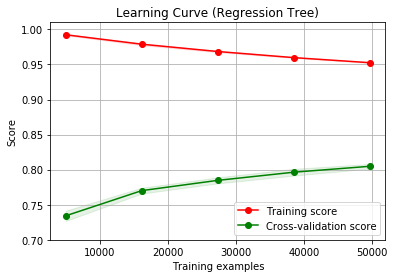

[[0.73575222 0.750467   0.74066683 0.71558049 0.74508618]
 [0.75668919 0.7573042  0.7495464  0.75212797 0.76390748]
 [0.76397694 0.76466331 0.76006412 0.76412967 0.7678383 ]
 [0.77050406 0.77181017 0.7683281  0.76956199 0.7728961 ]
 [0.77779569 0.77824254 0.77513367 0.77669771 0.77822806]]


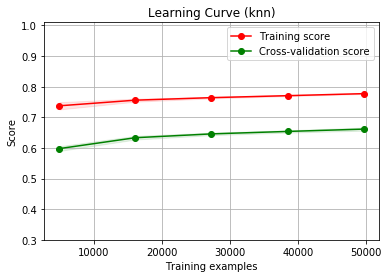

In [51]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): 
    
    plt.figure()                    
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") 
    plt.ylabel("Score")          
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
   
    print(train_scores)
 
    train_scores_mean = np.mean(train_scores, axis=1)  
    train_scores_std = np.std(train_scores, axis=1)   
    test_scores_mean = np.mean(test_scores, axis=1)   
    test_scores_std = np.std(test_scores, axis=1)     

    plt.grid()  
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")  
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")  
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
     
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") 
    return plt           

####################### Visualization of lerning curves for Lasso    ######

title = "Learning Curve (Lasso)"
 
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = neighbors.KNeighborsRegressor() 

plot_learning_curve(estimator, title, X, y, (0.5, 1.01), cv=cv, n_jobs=4)

plt.show()  


########################## Visualization of lerning curves for Regression Tree #####

title = "Learning Curve (Regression Tree)"
 
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = DecisionTreeRegressor()

plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()  


########################### Visualization of Learning Curves for knn ###########################
 
title = "Learning Curve (knn)"
 
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
estimator = neighbors.KNeighborsRegressor() 

plot_learning_curve(estimator, title, X, y, (0.3, 1.01), cv=cv, n_jobs=4)

plt.show()  